<a href="https://colab.research.google.com/github/InbalBolshinsky/Deep-Learning-Assigments/blob/main/exercise_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install required libraries
!pip install librosa matplotlib torchaudio -q

# Step 1: Download the Dataset
# We'll use the ESC-50 dataset for this exercise
!wget -q https://github.com/karoldvl/ESC-50/archive/refs/heads/master.zip -O esc50.zip

# Unzip the dataset and automatically overwrite files without prompting
!unzip -o -q esc50.zip

In [14]:
# Import necessary libraries
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import os

In [10]:
# Step 2: Load the dataset metadata
metadata_path = './ESC-50-master/meta/esc50.csv'
metadata = pd.read_csv(metadata_path)

# Display the first few rows of metadata
print("ESC-50 Dataset Metadata:")
print(metadata.head())

ESC-50 Dataset Metadata:
            filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A


In [11]:
# Select a sample file for analysis
audio_path = './ESC-50-master/audio/'
sample_file = os.path.join(audio_path, metadata.iloc[0]['filename'])

# Step 3: Analyze the sample audio
# Load the audio file
y, sr = librosa.load(sample_file)

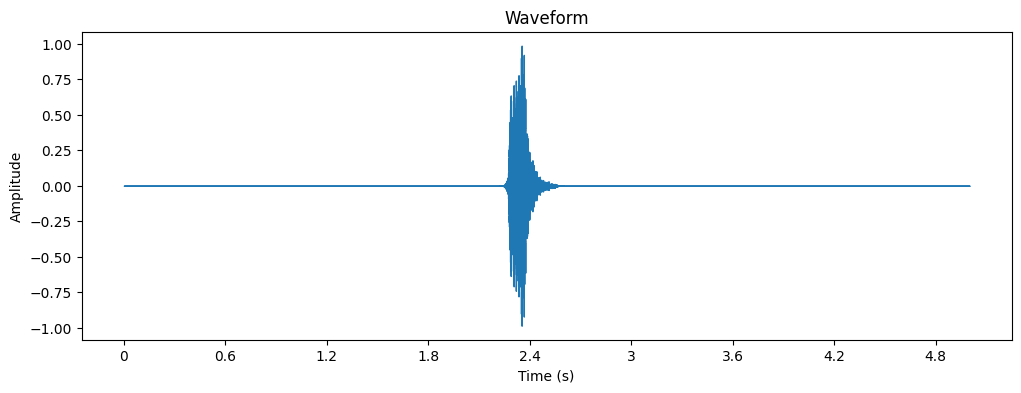

<ipython-input-12-be04a7195a7a>:10: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


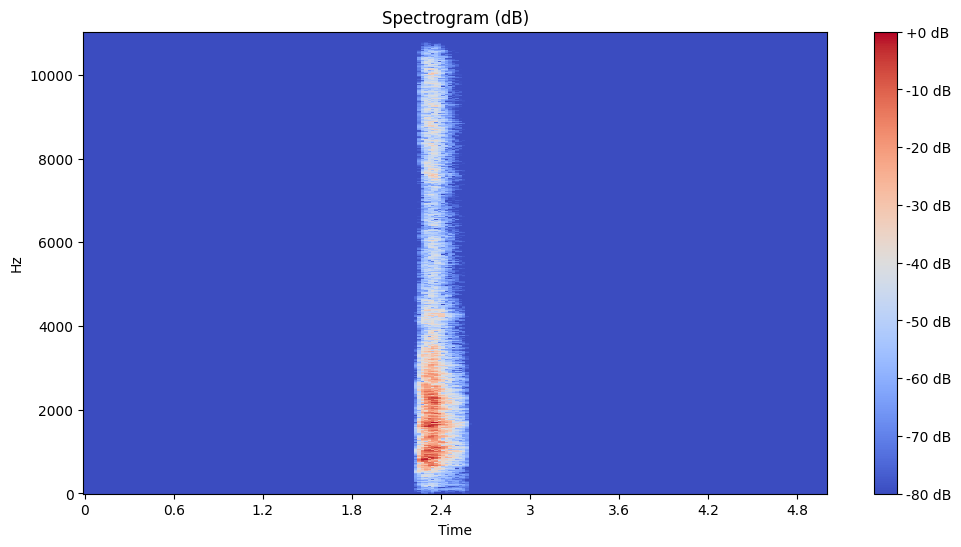

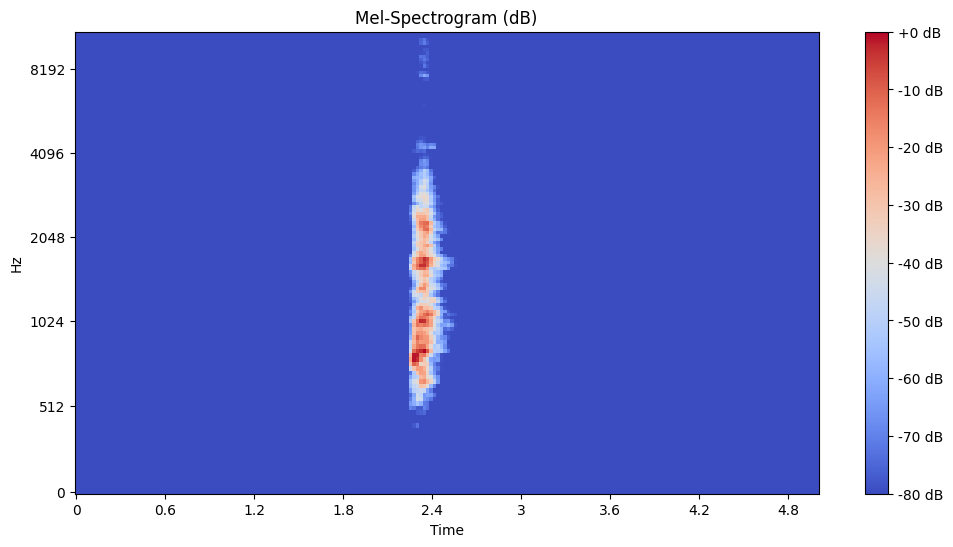

In [12]:
# Generate a waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Generate a spectrogram
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
plt.figure(figsize=(12, 6))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (dB)')
plt.show()

# Generate a Mel-spectrogram
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.figure(figsize=(12, 6))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram (dB)')
plt.show()

In [13]:
# Step 4: Classify the audio (simple approach)
# For demonstration, we'll print the label of the selected sample
sample_label = metadata.iloc[0]['category']
print(f"The selected audio sample is categorized as: {sample_label}")

The selected audio sample is categorized as: dog
